# Multiple Color Scales

Use `color_by`/`fill_by` parameters and `paint_a`/`paint_b`/`paint_c` aesthetics if you need to display two different layers with the same color aesthetic but different color scales.
Use [new scale functions](https://nbviewer.org/github/JetBrains/lets-plot/blob/master/docs/f-23a/scale_functions.ipynb) that allows to specify an aesthetic.

In [1]:
from lets_plot import *


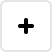
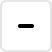
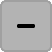
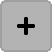
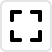
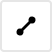
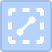
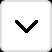
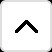
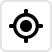
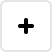
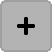
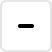
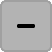
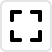
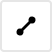
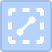
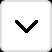
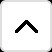
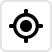

In [2]:
LetsPlot.setup_html()

In [3]:
def generate_data(p1, p2, p3, p4, p5, x_max=400, y_max=300):
    import math

    def calculate_z(x, y):
        z = math.sin(x * p1 * math.pi / x_max)
        z += math.sin(y * p2 * math.pi / y_max)
        z += x * p3 / x_max
        z += y * p4 / y_max
        return z * p5

    x = []
    y = []
    z = []
    for row in range(y_max - 1):
        for col in range(x_max - 1):
            x.append(col)
            y.append(row)
            z.append(calculate_z(col, row))

    return dict(x=x, y=y, z=z)

In [4]:
height_data = generate_data(3, 3, 3, 5, 11)
temperature_data = generate_data(1, 2, 5, 4, -.5)

In [5]:
ggplot() + \
    geom_contour(aes('x', 'y', z='z', color='..level..'), \
                 data=height_data, bins=15, size=1) + \
    geom_contour(aes('x', 'y', z='z', paint_a='..level..'), \
                 data=temperature_data, color_by='paint_a', \
                 bins=8, size=1) + \
    scale_color_gradient(name="height", low="#993404", high="#ffffd4") + \
    scale_gradient('paint_a', name="temperature", low="#0571b0", high="#ca0020") + \
    ggsize(800, 600)